Pep-talk? Notes? I'm not sure what to call this section: 

-----------------------------

Despite being magical, recursion is a bit challenging. I strongly urge you to use a pencil and paper as you go through some of the simpler functions presented in this lecture to ensure that you REALLY understand when the rest of the program is pausing and handing off a variable to a function. It will also help to play around with the 'spacer' variable introduced towards the end of this notebook so you can see which recursion loop you are in -indicated by the level of indentation- at any given moment of the program.  

I have done something a bit simple in this notebook- but effective for illustration - to the generate_kmers_rec function. We saw how to build trinucleotides in Lecture_3A; generat_kmers_rec simply extends that to creating polynucleotides of any length specified by the user. For the trinucleotide loop, I used the same order in the outer, middle and inner for loops, ["A","C","G","T"]. In the kmer function, in order to try to make it easier to see where in the loop you are, I have listed the bases in a different order, as described below: 

The base case when length ==1, has the bases listed in the order ["A","C","G","T"]. I have reversed the order of the bases listed as part of the for loop in the recursion loop, ie. for base in ["T","G","C","A"]:. This allows you to see how the kmers are being created (and thus, how the program is pausing the filling up of the results list on the final loop as it creates and fills up the results lists on the earlier loops). It wasn't clear which results list was being created first when the first item appeared as "AA" but now the first item will be "AT" so it is easier to infer how the loops are being used. 

Farther down in the notebook, I also introduce including spaces into the loops. This allows you to visualize where in the function you are at without having to include a bunch of cluttering print statements (although, if that helps you, you should consider it!). 

In [9]:
# This is a sierpinski triangle animation to show you how 
# cool recursion - and fractals! - can be: 
# simple rules, make a recursive triangle that looks like a christmas
# tree. 
# Code stolen from here: 
# https://github.com/IlievskiV/Amusive-Blogging-N-Coding/blob/master/Visualizations/sierpinski_triangle.ipynb

import random
from operator import add
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np

rc('animation', html='jshtml')

# ignore warnings <--- Usually this isn't the best idea, but...
import warnings
warnings.filterwarnings("ignore")

def generate_sierpinski_triangle(n: int):
  """Function to generate the points on the Sierpinski triangle.
  Args:
    n (int): number of points to generate
  
  Returns:
    list: list of tuples representing the points belonging 
      to the Sierpinski triangle.
  """
# generating the sierpinski triangle: 
def generate_sierpinski_triangle(n: int):
    sierpinski_triangle = []  # final list of points

    # initial points
    A = (0.0, 0.0)
    B = (0.5, 1.0)
    C = (1.0, 0.0)
    triangle_vertices = [A, B, C]

    # starting point
    moving_point = random.choice(triangle_vertices)

    for i in range(n):
        offset_point = random.choice(triangle_vertices)
        moving_point = list(map(lambda x: x / 2.0, list(map(add, moving_point, offset_point))))
        sierpinski_triangle.append(moving_point.copy())
    
    return sierpinski_triangle

def plot(sierpinski_triangle: list):
  """Make a plot of the points in the Sierpinski triangle.
  Args:
    sierpinski_triangle (list): list of tuples representing the points belonging 
      to the Sierpinski triangle.
  """
  num_points = len(sierpinski_triangle)
  points_split = list(zip(*sierpinski_triangle))
  xx, yy = points_split[0], points_split[1]

  fig = plt.figure(figsize=(5, 5))
  ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
  ax.set_xticks([], [])
  ax.set_yticks([], [])
  ax.set_axis_off()
  ax.scatter(xx, yy, c=np.random.rand(len(xx),3), marker='.')
  ax.text(0.01, -0.06, 'by Vladimir Ilievski', fontsize=18)
  plt.savefig(f'sierpinski_triangle_{num_points}.png', dpi=300, bbox_inches='tight')
    
def make_animation(sierpinski_triangle: list):
  """Make an animation of the Sierpinski triangle by zooming in.
  Args:
    sierpinski_triangle (list): list of tuples representing the points belonging 
      to the Sierpinski triangle.
  """
  num_points = len(sierpinski_triangle)
  points_split = list(zip(*sierpinski_triangle))
  xx, yy = points_split[0], points_split[1]
  fig = plt.figure(figsize=(10, 10))

  def init():
    ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_axis_off()
    return ax.plot(xx, yy, "g.")

  def animate(i):
    scale = 1 - i * 0.02  # calculate the new scale
    ax = plt.axes(xlim=(0, scale), ylim=(0, scale))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_axis_off()
    return ax.plot(xx, yy, "g.")

  anim = animation.FuncAnimation(fig, animate, init_func=init, frames=50, 
                                 interval=200, blit=False)
  anim.save(f"sierpinski_{num_points}.gif", writer="pillow")
  plt.show() 

In [10]:
sierpinski_triangle_1 = generate_sierpinski_triangle(20000)
sierpinski_triangle_2 = generate_sierpinski_triangle(2000000)

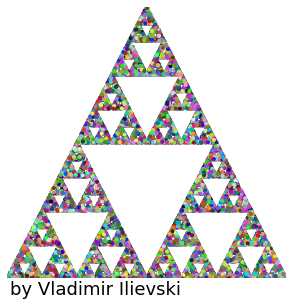

In [11]:
plot(sierpinski_triangle_1)

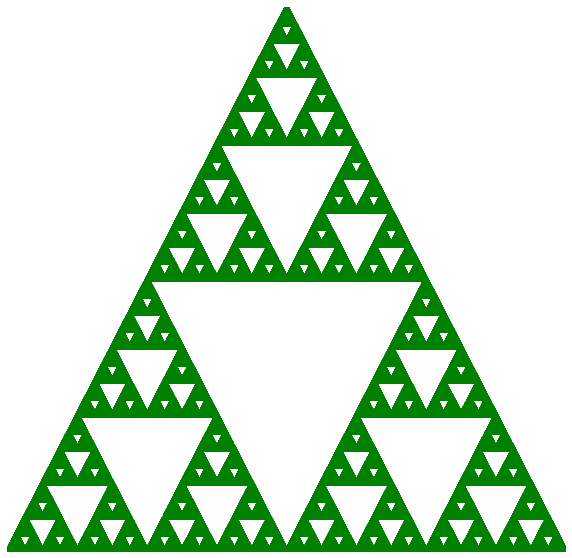

In [14]:
make_animation(sierpinski_triangle_2)

# Lecture 11 - Recursion is magic!

* open 'google' search engine. Type in 'recursion' and press return. What is the result? 

* To review: functions. They can call other functions. They can also call THEMSELVES.

* remember some aspects of functions: 
     * when a function executes, the only information it has from its calling context are variables passed in from the calling function through its formal parameters
     * the calling function knows nothing about how the function operates- all it gets is the return value.
     
* Appreciating the above two properties are going to be helpful when breaking down a recursive function. 

* Escher exemplifies recursion: 

https://en.wikipedia.org/wiki/Drawing_Hands#/media/File:DrawingHands.jpg

* of course, xkcd also weighs in on the matter of recursion since it is such an important topic: 
https://xkcd.com/1739/


Remember (this is particularly important for recursion): 

the %%time method is a magic command that will calculate the entire execution of the entire cell. It should work regardless of your operating system. 

I was struggling to get this to work and finally discovered the answer: 

YOU MUST HAVE NO BLANK LINES (even comments) ABOVE THE %%time command for it to work. For instance, this: 

----------------------------

#here is the time command

%%time

rest of code written out

----------------------------

won't work!

but this:

--------------------------

%%time

rest of code 

--------------------------
will work just fine. 

#### Let's begin with a reminder that functions can call other functions: 

In [15]:
%%time
# functions can call other functions
def cube(number):
    return number**3
    
def by_three(number):
    if number%3 ==0:
        return cube(number)
    else:
        return False
    
print(by_three(27))

19683
CPU times: user 1.34 ms, sys: 1.66 ms, total: 3 ms
Wall time: 3.37 ms


* We see recursion in other fields like, say, math: 

Example: Factorial
> **Base rule:** checks to see if we have reached the ultimate state (ie. have we reached the stopping condition and, if so, what should we do?)
>>0!

> **General rule:** or **Recursive rule** is when the functions calls itself
>>n!=n*(n-1)!


* It is CRUCIAL to have at least one 'base case rule' which dictates what happens when you get a certain point and a 'general rule' or 'recursive rule', ie. what happens the rest of the time. 

Much like in a while loop, if you fail to specify a base case, you can get stuck in an infinite loop (or an infinite recursion).

#### Recursion is often the best way to solve a problem that is made up of smaller versions of the same problem repeatedly. 

* pros: 
    * efficient way to think about solution
        * for some highly specific problems, may be the only way to solve
    * it is the kind of method that shows up A LOT on coding interviews
    * allows you to expand your thinking about programming

* cons: 
    * really, really memory intensive
    * complex

Let's start where everyone learning recursion begins, with factorial. 

In [19]:
%%time
# The non-recusive method of determining the factorial - WE SAW THIS PREVIOUSLY!
def factorial(x):
    fac=1
    while x!=0:
        # if x=4, 4*3*2*1
        fac=fac*x
        x=x-1
    return fac
   
print(factorial(10))

3628800
CPU times: user 416 µs, sys: 294 µs, total: 710 µs
Wall time: 716 µs


In [21]:
%%time
# The recursive method of determining the factorial!
def factorialrec(x):
    #note: This is incredibly important: there must always be a BASE
    # case with recursion. 
    if x==0:
        return 1
    else:
        #print(x)
        return x*factorialrec(x-1)
    
print(factorialrec(10))

10
9
8
7
6
5
4
3
2
1
3628800
CPU times: user 347 µs, sys: 132 µs, total: 479 µs
Wall time: 492 µs


In [24]:
# Another trivial example of recursion. We could modify this to do
# something more interesting. Let's say, for instance, we wanted 
# to print off all values from 1-->number. 
def sub_one(number):
# WE ALWAYS NEED A  BASE CASE OR THE RECURSION WILL NEVER STOP. 
# You could hash out the base case and see for yourself the exception that is raised. 
    if number==1:
        return 1
    # the function CALLS ITSELF. Is your mind blown yet?
    print(number)
    return sub_one(number-1)
        
    # call the function
print(sub_one(4))

4
3
2
1


In Lecture pseudo-code example (this one is HARD!): 
---------------------------------------------------------------

This problem uses recursion to find hidden palindromes in strings. This problem is a "poster child" for recursion since it would be very hard to solve this problem in any other way! Note: there are a bunch of conceptually-related (although solved in different ways) problems in computer science and bioinformatics such as: https://en.wikipedia.org/wiki/Longest_common_subsequence_problem

Notice that the sequence "zryxadavr" contains the palindrome subsequence "radar" within it:

    * input is *zryxadavr*
    * the output is *r  ada r*
In fact, "radar", which has length 5, is the longest palindrome that can be found embedded in "zryxadavr". We say that "radar" is the longest palindromic subsequence (LPS) in the given string "zryxadavr".

Long palindromic subsequences in DNA are correlated to human cancers and thus finding them - or at least their lengths - is a useful tool in studying cancer. (Choi, Charles Q (2005) DNA palindromes found in cancer. Genome Biology; More recently: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5260791/). An sequence example of a palindrome is: 5′-GTTAGCTAAC-3'.

We want to write a function called LPS(myString) that takes a string as input and returns the length of the longest palindromic subsequence. We could modify the built-in function max that takes two numbers as input and returns the larger of those two. Try not to write too much code - this is just a pseudo-coding example. 
Here are a few examples which input and output given:

>LPS("zryxadavr")
5

>LPS("abcdefg")
1

> LPS("aaxyz")
2

> LPS("axbzay")
3

> LPS("abcxcybza")
7

> LPS("ATGCATCATTGACCA")
10

In [1]:
# BEFORE YOU TRY TO SOLVE THE PROBLEM ABOVE, CHECK OUT THE SOLUTION
# TO A SIMILAR BUT LESS COMPLEX PROBLEM: 
# _______________________________
# I found this code on the web that solves a similar problem to the
# one given above just as a demonstration.
# This solution emphasizes the need to break a larger problem into smaller problems
# to effectively solve it. 
# in this case, the first function takes a user-specified word and calls a second function,
# called reverse, to check if the word can be written forwards and backwards and if 
# both directions result in the same word. 
def reverse(usrWrd, index, newWord):
    if index < 0:
        return newWord
    else:
      newWord += usrWrd[index]
      return reverse(usrWrd, index - 1, newWord)

def main():
    newWord = ""
    usrWrd = input("please enter a word to check for palindrome-ness:")
    # note: you would probably want to add in features here, like a while loop, that 
    # check that the user has put in all upper or lower letters and otherwise appropriate
    # input. For example, I inputed Radar- with a capital R- and it
    # didn't recognize it as a palindrome.
    result = reverse(usrWrd, len(usrWrd) - 1, newWord)

    if result == usrWrd:
        print("That word is a palindrome")
    else:
        print("Sorry,",usrWrd,  "is NOT a palindrome")
        
print(main())

please enter a word to check for palindrome-ness:radar
That word is a palindrome
None


Another example of recursion: 

In [25]:
%%time
# --------------------------------
# In this cell, I am trying to show you that value is 3 is being
# evaluated and then pauses to evaluate value 2 which then pauses
# to evaluate value 1. which then completes
# and prints out the ~~~~~ and the other print statements before 
# returning to value 2 which then prints out the ~~~~~ and the
# other print statements before returning to value 3
# that's what the print statements are supposed to show you, at least
# --------------------------------

def printFunc(test):    
    if (test < 1):
        #return nothing ie. None is the word supplied to you by Python
        return
    else:  
        # This will print out the variable, an integer, followed by a newline
        # This chunk of code prints out the variables 3, 2 and 1 and then prints 
        # them out in reverse 1,2,3 as the recursion line resolves and releases
        # the embedded recursions from memory. 
        #1st time through this should print 3
        print(test,"\n")
        # Next: Recursion Magic. the function pauses and calls itself.
        # We call the function from within the function with 1 less integer value
        #first time through, we are passing the value of 2
        #----------------------------------------------------------
        printFunc(test-1) 
        # When the following ~~~~~~ prints out, we know that we have left the recursion
        #loop because the BASE CASE -- the if statement -- has returned to the printFunc(0) 
        # and the other variables - that are still in paused loops- need to be 
        # resolved now so the program now continues.
        print("~~~~~~")
        print(test)
        print("----------") 
        #----------------------------------------------------------
        #returning nothing because you are printing to the screen.
        return
       
test = 3
printFunc(test)
#BECAUSE we have nothing specified to return, Python helpfully provides us with None
#when print out the results of the printFunc()
#print(printFunc(test))

3 

2 

1 

~~~~~~
1
----------
~~~~~~
2
----------
~~~~~~
3
----------
CPU times: user 2.82 ms, sys: 1.16 ms, total: 3.98 ms
Wall time: 19.6 ms


## MY VIDEO WAS INTERRUPTED HERE SO YOU WILL NEED TO WATCH LECTURE_3Cii for the second half which starts here:

------------------------------

In Lecture_3A, we generated trinucleotides ('trimers') and their counts. We could have used functions to generate the trinucleotides, as shown in the next cell. 

_The issue with the code below is that it isn't particularly flexible. What would happen if, for instance, we wanted to generate kmers instead of trimers?_


In [26]:
%%time
def generate_trimers():
    bases=["A","C","G","T"]
    result=[]
    #we know that, in this case, that we are creating a trimer
    for base1 in bases:
        #for A then C followed by G and, finally, T
        for base2 in bases:
            #for A then C and then G and then T
            for base3 in bases:
                #for A then C and then G and then T
                result.append(base1+base2+base3)
    #first time through the loop should create result AAA,AAC,AAG,AAT
    #then you are adding ACA,ACC,ACG,ACT and AGA,AGC,AGG,AGT and ATA,ATC,ATG,ATT
    return result

print(generate_trimers())

['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']
CPU times: user 160 µs, sys: 86 µs, total: 246 µs
Wall time: 179 µs


In [3]:
%%time
def generate_kmers(length):
# ---------------------------------------------
# in this script, we don't know how long the kmer should be or, rather, we want
# length to be robust and specified as an argument
# set the solution to this problem up as a series of for loops, like in the cell 
# above but since we don't know the final length of -mer, we can't use a set
# number of for loops. 
# How are we going to tackle this problem? 
# ---------------------------------------------
    result=["A","C","G","T"]
    #create a list of unimers - the user can't specify length 0 which could make 
    # the code less robust so we could insist on parameters. 
    for i in range(0,length-1):
    # for loop to decrement by 1 each time through
        new_result=[]
        #new result that is currently empty - it will hold extended -mres
        #for kmer in ["1","2","3","4"]: # <-- even easier to see
        for kmer in ["T","C","G","A"]:
        # Purpose of this loop is to add one more nt to the end of a -mer each time through
        # You begin with four unimers and after the first time through the loop, 
        # you end with 4**2 dimers and the third time through, you end up with a list of
        # length 4**3 trimers etc
            for base in result:
                new_result.append(kmer+base)
                #first time through kmer = A so the new_result will be a list of dimers
                #new_result=[AA,AC,AG,AT] then kmer will be C, G and finally T
                #this will result in 16 dimers
        result=new_result
        #replace unimer result list with dimer list and go to line 8 until length-1... 
        # so for 4, that is three
    return result

print(generate_kmers(3))
# this is really long:
#print(generate_kmers(5))

['TTA', 'TTC', 'TTG', 'TTT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TAA', 'TAC', 'TAG', 'TAT', 'CTA', 'CTC', 'CTG', 'CTT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CAA', 'CAC', 'CAG', 'CAT', 'GTA', 'GTC', 'GTG', 'GTT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GAA', 'GAC', 'GAG', 'GAT', 'ATA', 'ATC', 'ATG', 'ATT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'AAA', 'AAC', 'AAG', 'AAT']
CPU times: user 562 µs, sys: 287 µs, total: 849 µs
Wall time: 700 µs


Okay. Great. We have built in some flexibility into the code. Now we begin to concern ourselves with efficiency. The code above is a bit cumbersome. 

What is happening in the code below?

#### I cannot stress this enough -  use a pencil and paper and draw out what is happening with the code below.
    * If you understand where you are at any given time in the 'layers' of memory with the result list, you can confidently say that you understand recursion!

In [31]:
#%%time
#instead of nested for loops, we can do the same thing more efficiently with recursion....
# -----------------------------------------------------
# warning: recursion is a way of thinking that is counter-intuitive initially and, much 
# like while loops, should be undertaken with great care so you don't get stuck.
# -----------------------------------------------------
# the strategy of the following code can be summarized as the following:
# * to get a list of all possible kmers of a given length, start by checking the length.
#      1. if length is one - base case -  you are all done.
#      2. if length if > one, take the list of all possible sequences whose length is one 
        # less than the length you're looking for and add each of the four possible bases
        # to each of it's elements to get the result
# -----------------------------------------------------

def generate_kmers_rec(length):
# -----------------------------------------------------
#IMPORTANT WITH RECURSION: ALWAYS establish a base case: if 
# the length is 1, then simply return a list of unimers
# (similar to while loops). This will be the 'outer loop' of the recursion
# visited. So you can see in the example below that the letters A C G and T will 
# be added to the numbers that are added in the else loop. 
# -----------------------------------------------------
    if length==1:
        return ["A","C","G","T"]
    #if length is >1 then
    else:
    #intialize an empty list. 
    # key to understanding: this result list will be present in the memory layer for 
    # length=1, there will be a different result list - even though it has the same variable
    # name - for the memory layer that has length=2 and finally a different one will be 
    # present for the memory layer for length =3. 
        result=[]
# -----------------------------------------------------
# ONTO THE MAGIC PART OF THIS SOLUTION!
# -----------------------------------------------------
        for seq in generate_kmers_rec(length-1):
    # for length =2, we call the function itself and it is >1, so we initialize empty 
    # result list for length 2 BECAUSE OF SCOPING RULES <-- you knew that was gonna come in
    # handy. We call the function again but this time, length 1 so it returns and 
    # function call is over.
            print("what is length-1? This will remind you where you are in the recursion stack: " +str(length-1))
    #NOTE: IN ORDER TO UNDERSTAND WHAT IS HAPPENING HERE, I have changed 
    # THIS TO BE for base in ["1","2","3","4"] just so you can keep
    # track of where you are in the recursion 'stack'. To produce a
    # kmer, you should change it back to ["T","G","C","A"].
            for base in ["1","2","3","4"]:
    #now it returns to the point in the code where it stopped to call the other function
    #so you have result list for 2 which is [A,C,G,T] which you are then appending to
                result.append(seq+base)
                print(result)
        #like the for loop example before, this gives: AA,AC,AG,AT,CA,CC,CG,CT etc.
        return result

print(generate_kmers_rec(3))

what is length-1? This will tell you where you are in the recursion stack: 1
['A1']
['A1', 'A2']
['A1', 'A2', 'A3']
['A1', 'A2', 'A3', 'A4']
what is length-1? This will tell you where you are in the recursion stack: 1
['A1', 'A2', 'A3', 'A4', 'C1']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4']
what is length-1? This will tell you where you are in the recursion stack: 1
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2', 'G3']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2', 'G3', 'G4']
what is length-1? This will tell you where you are in the recursion stack: 1
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2', 'G3', 'G4', 'T1']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2', 'G3', 'G4', 'T1', 'T2']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4',

## When to consider using recursion: 
     * solves a larger problem in terms of a smaller one 
     * argument must change each time (to avoid an infinite loop) 
     * the changing argument value must be approaching the **BASE CASE** 
     * should return the result of the sub function call plus something else 
     
### Basic premise of recursion: 
    * leverages scoping rules - I can change the argument in middle of the function before passing it back to the function itself because of scoping
    * BASE CASE, BASE CASE, BASE CASE!

### Okay, sounds complicated. Shouldn't we just stick to nested for loops since they take us pretty far...
* Most professional programmers will tell you that outside some very specific (usually mathematical) implementations, it is usually better to use a loop
### Recursion is perfect for one particular use in biology that is challenging to solve otherwise....

                                        TREE LIKE DATA
* Two major types encountered in biology: 
    1. Child-to-parent (bottom up)
    2. Parent-to-child (top down)     
* Recursion is better than iteration when you have complicated NESTED DATA – which is we often do in biology (phylogenies). 
    * used in common algorithms such as bubble-sort, binary searches, Artifical intelligence (nested searches, at least), trees (especially important in "top down" searches)
* If you don’t have much memory (stack overflow) than usually iteration is better since recursion takes up a lot of working memory since the function is active for much longer than in iteration.

#### Bottom Up (Child-to-parent)
example: Homo sapiens are a member of the group Homo which, in turn, is a member of the group Homininae
* easiest way to handle this type of relationship in Python? 

         * Simply use a dictionary. We can easily add new elements to the dictionary
         
         * The following example looks complicated but, thanks to a dictionary, it is easy to manage/expand
         
         * we can also use recursion (we'll see how) but dictionary is most straightforward

<div>
<img src="primates.jpg" width="450"/>
</div>

In [32]:
tax_dict={"Pan troglodytes":"Hominoidea","Pongo abelii":"Hominoidea","Hominoidea":"Simiiformes","Simiiformes":"Haplorrhini","Tarsius tarsier":"Tarsiiformes","Haplorrhini":"Primates","Tarsiiformes":"Haplorrhini","Loris tardigradus":"Lorisidae","Lorisidae":"Strepsirrhini","Strepsirrhini":"Primates","Allocebus trichotis":"Lemuriformes","Lemuriformes":"Strepsirrhini","Galago alleni":"Lorisiformes","Lorisiformes":"Strepsirrhini","Galago moholi":"Lorisiformes"}
print(tax_dict)

{'Pan troglodytes': 'Hominoidea', 'Pongo abelii': 'Hominoidea', 'Hominoidea': 'Simiiformes', 'Simiiformes': 'Haplorrhini', 'Tarsius tarsier': 'Tarsiiformes', 'Haplorrhini': 'Primates', 'Tarsiiformes': 'Haplorrhini', 'Loris tardigradus': 'Lorisidae', 'Lorisidae': 'Strepsirrhini', 'Strepsirrhini': 'Primates', 'Allocebus trichotis': 'Lemuriformes', 'Lemuriformes': 'Strepsirrhini', 'Galago alleni': 'Lorisiformes', 'Lorisiformes': 'Strepsirrhini', 'Galago moholi': 'Lorisiformes'}


In [3]:
# We can add a loop that extracts out the ancestors of the individual 
# node inputted as an argument
def get_ancestors(taxon):
    result=[taxon]
    while taxon !="Primates":
        result.append(tax_dict.get(taxon,"0"))
        #Set value of the taxon variable to be the name of the parent taxon
        # which becomes the child in the next iteration. 
        # Look! I have used the get method!
        taxon =tax_dict.get(taxon,"0") 
        #print(result)
    return result

tax_dict={"Pan troglodytes":"Hominoidea","Pongo abelii":"Hominoidea","Hominoidea":"Simiiformes","Simiiformes":"Haplorrhini","Tarsius tarsier":"Tarsiiformes","Haplorrhini":"Primates","Tarsiiformes":"Haplorrhini","Loris tardigradus":"Lorisidae","Lorisidae":"Strepsirrhini","Strepsirrhini":"Primates","Allocebus trichotis":"Lemuriformes","Lemuriformes":"Strepsirrhini","Galago alleni":"Lorisiformes","Lorisiformes":"Strepsirrhini","Galago moholi":"Lorisiformes"}
print(get_ancestors("Pan troglodytes"))
#print(get_ancestors("me"))

['Pan troglodytes', 'Hominoidea', 'Simiiformes', 'Haplorrhini', 'Primates']


In [35]:
# We could also solve this through recursion
# -----------------------------------------
# ***********I USED THIS AS PART OF THE SOLUTION FOR your recursion problem set! ***********
# -----------------------------------------
def get_ancestors(taxon):
    #base case: you are already at the top of the tree
    if taxon=="Primates":
        return []
    else:
        parent=tax_dict.get(taxon)
        parent_ancestors=get_ancestors(parent)
        return [parent]+parent_ancestors
        # what happens if you hash out the return statement on line 12 and use the
        # hashed out return statement on line 16? Is it what you expected to happen?
        # why or why not? 
        #return []+parent_ancestors
    
tax_dict={"Pan troglodytes":"Hominoidea","Pongo abelii":"Hominoidea","Hominoidea":"Simiiformes","Simiiformes":"Haplorrhini","Tarsius tarsier":"Tarsiiformes","Haplorrhini":"Primates","Tarsiiformes":"Haplorrhini","Loris tardigradus":"Lorisidae","Lorisidae":"Strepsirrhini","Strepsirrhini":"Primates","Allocebus trichotis":"Lemuriformes","Lemuriformes":"Strepsirrhini","Galago alleni":"Lorisiformes","Lorisiformes":"Strepsirrhini","Galago moholi":"Lorisiformes"}
print(get_ancestors("Pan troglodytes"))
#print(get_ancestors("Primates"))

['Hominoidea', 'Simiiformes', 'Haplorrhini', 'Primates']


In [42]:
# We could also solve this through recursion
# -----------------------------------------
# ***********I USED THIS AS PART OF THE SOLUTION FOR your recursion problem set ***********
# This example uses the same functions as above you can see how it is used 
# COMPARE IT TO THE CELL BELOW WHERE I DO THE SAME THING BUT USING APPEND AND AN
# EXPLICITLY DEFINED LIST. 
# -----------------------------------------
def get_ancestors(taxon):
    #base case: you are already at the top of the tree
    if taxon=="A":
        return []
    else:
        parent=tax_dict.get(taxon)
        parent_ancestors=get_ancestors(parent)
        return [parent]+parent_ancestors
         # what happens if you hash out the return statement on line 15 and use the
        # hashed out return statement on line 19? Is it what you expected to happen?
        # why or why not? 
        #return []+parent_ancestors

tax_dict={"C11":"B1","C12":"B1","C21":"B2","C22":"B2","B1":"A","B2":"A"}
print(get_ancestors("C11"))

['B1', 'A']


In [45]:
# -----------------------------------------
# You are returning a list of all of the ancestors of a particular individual
# in this function, you don't add the individual itself to the list but you will 
# want to create a second function that adds the individual to the list
# eg. the final list in the given example should be ["C11","B1","A"]
# -----------------------------------------
def get_ancestors(taxon):
    #taxon_list=[]
    #base case: you are already at the top of the tree
    if taxon=="A":
        return taxon_list
    else:
        parent=tax_dict.get(taxon)
        parent_ancestors=get_ancestors(parent)
        taxon_list.append(parent)
        return taxon_list
        #return [parent]+parent_ancestors
#This is the tricky part:you have to create the empty list outside of the function 
taxon_list=[]
#you want to reverse this list since it isn't as intuitive 
tax_dict={"C11":"B1","C12":"B1","C21":"B2","C22":"B2","B1":"A","B2":"A"}
print(get_ancestors("C11"))
print("--------")
taxon_list.reverse()
print(taxon_list)

['A', 'B1']
--------
['B1', 'A']


We can do something kinda fancy with recursion called obtaining "the depth of stack". You get this by combining print statements with spaces that increase with each iteration of the recursion. 

Example without the depth of stack spacer and, directly underneath it, the one with the spacer. It's a useful trick: 

In [41]:
def get_ancestors(taxon):
    if taxon=="Primates":
        print ("Taxon is Primates - you are the top of this phylogeny already!")
        return [] # you are already at the top of the tree
    else:
        print("Taxon is not Primates so it must have at least one ancestor")
        parent=tax_dict.get(taxon)
        print("The parent is "+parent+" ")
        print("Looking up ancestors for "+parent)
        parent_ancestors=get_ancestors(parent)
        print("parents ancestors are "+str(parent_ancestors))
        #adding to a result list that you will return
        result=[parent]+parent_ancestors
        print("about to return the result: "+str(result))
        return result


tax_dict={"Pan troglodytes":"Hominoidea","Pongo abelii":"Hominoidea","Hominoidea":"Simiiformes","Simiiformes":"Haplorrhini","Tarsius tarsier":"Tarsiiformes","Haplorrhini":"Primates","Tarsiiformes":"Haplorrhini","Loris tardigradus":"Lorisidae","Lorisidae":"Strepsirrhini","Strepsirrhini":"Primates","Allocebus trichotis":"Lemuriformes","Lemuriformes":"Strepsirrhini","Galago alleni":"Lorisiformes","Lorisiformes":"Strepsirrhini","Galago moholi":"Lorisiformes"}
#print(get_ancestors("Pan troglodytes"))
print(get_ancestors("Galago alleni"))

Taxon is not Primates so it must have at least one ancestor
The parent is Lorisiformes 
Looking up ancestors for Lorisiformes
Taxon is not Primates so it must have at least one ancestor
The parent is Strepsirrhini 
Looking up ancestors for Strepsirrhini
Taxon is not Primates so it must have at least one ancestor
The parent is Primates 
Looking up ancestors for Primates
Taxon is Primates - you are the top of this phylogeny already!
parents ancestors are []
about to return the result: ['Primates']
parents ancestors are ['Primates']
about to return the result: ['Strepsirrhini', 'Primates']
parents ancestors are ['Strepsirrhini', 'Primates']
about to return the result: ['Lorisiformes', 'Strepsirrhini', 'Primates']
['Lorisiformes', 'Strepsirrhini', 'Primates']


In [2]:
def get_ancestors(taxon,depth):
    spacer="   "*depth
    # You can use tabs, instead!
    # spacer="\t"*depth
    print(spacer+"calculating ancestors for "+taxon)
    if taxon=="Primates":
        print(spacer+"Taxon is Primates - you are the top of this phylogeny already!")
        return [] # you are already at the top of the tree
    else:
        print(spacer+"Taxon is not Primates so it must have at least one ancestor")
        parent=tax_dict.get(taxon)
        print(spacer+"The parent is "+parent+" ")
        print(spacer+"Looking up ancestors for "+parent)
        parent_ancestors=get_ancestors(parent,depth+1)
        print(spacer+"parents ancestors are "+str(parent_ancestors))
        result=[parent]+parent_ancestors
        print(spacer+"about to return the result: "+str(result))
        return result


tax_dict={"Pan troglodytes":"Hominoidea","Pongo abelii":"Hominoidea","Hominoidea":"Simiiformes","Simiiformes":"Haplorrhini","Tarsius tarsier":"Tarsiiformes","Haplorrhini":"Primates","Tarsiiformes":"Haplorrhini","Loris tardigradus":"Lorisidae","Lorisidae":"Strepsirrhini","Strepsirrhini":"Primates","Allocebus trichotis":"Lemuriformes","Lemuriformes":"Strepsirrhini","Galago alleni":"Lorisiformes","Lorisiformes":"Strepsirrhini","Galago moholi":"Lorisiformes"}
#print(get_ancestors("Pan troglodytes"))
print(get_ancestors("Galago alleni",2))

      calculating ancestors for Galago alleni
      Taxon is not Primates so it must have at least one ancestor
      The parent is Lorisiformes 
      Looking up ancestors for Lorisiformes
         calculating ancestors for Lorisiformes
         Taxon is not Primates so it must have at least one ancestor
         The parent is Strepsirrhini 
         Looking up ancestors for Strepsirrhini
            calculating ancestors for Strepsirrhini
            Taxon is not Primates so it must have at least one ancestor
            The parent is Primates 
            Looking up ancestors for Primates
               calculating ancestors for Primates
               Taxon is Primates - you are the top of this phylogeny already!
            parents ancestors are []
            about to return the result: ['Primates']
         parents ancestors are ['Primates']
         about to return the result: ['Strepsirrhini', 'Primates']
      parents ancestors are ['Strepsirrhini', 'Primates']
      about to

#### Top Down (Parent-to-child)
* Top down relationships are more complicated because __keys__ in dictionaries have to be unique
* Example: primates contain two groups – Haplorrhini and Strepsirrhini
            * you can’t write them as this: 
                    dict_prim={“Primates”:”Haplorrhini”,”Primates”:”Strepsirrhini”}
            * Because Primates is not a unique key in this example
            * What to do?
                - Nest lists with children within the dictionary so the keys remain unique
               - example: 
          
               tax_dict={“Strepsirrhini”:[“Lorididae”,”Lemuriformes”,”Lorisiformes”]}


In [4]:
def get_children(taxon):
    result=[]
    stack=[taxon]
    while len(stack) !=0:
        current_taxon=stack.pop()
        current_taxon_children=new_tax_dict.get(current_taxon,[])
        stack.extend(current_taxon_children)
        result.append(current_taxon)	
    return result

new_tax_dict={"Primates":["Haplorrhini","Strepsirrhini"],"Tarsiiformes":["Tarsius tarsier"],"Haplorrhini":["Tarsiiformes","Simiiformes"],"Simiiformes":["Hominoidea"],"Lorisidae":["Loris tardigradus"],"Lemuriformes":["Allocebus trichotis"],"Lorisiformes":["Galago alleni","Galago moholi"],"Hominoidea":["Pongo abelii","Pan troglodytes"],"Strepsirrhini":["Lorisidae","Lemuriformes","Lorisiformes"]}
#print(get_children("Tarsiiformes"))
print(get_children("Primates"))

['Primates', 'Strepsirrhini', 'Lorisiformes', 'Galago moholi', 'Galago alleni', 'Lemuriformes', 'Allocebus trichotis', 'Lorisidae', 'Loris tardigradus', 'Haplorrhini', 'Simiiformes', 'Hominoidea', 'Pan troglodytes', 'Pongo abelii', 'Tarsiiformes', 'Tarsius tarsier']


In [43]:
# What are we doing in this code?  Create a single result list which initially
# contains the taxon that was given
# as an argument. Then we look up children for that taxon. Then for each child,
# we add its children to the result
# using the recursion call. Then we return the list

def get_children_rec(taxon):
    result=[taxon]
    children=new_tax_dict.get(taxon,[])
    for child in children:
        print("For the "+child+" the parent taxon is: "+str(result))
        result.extend(get_children_rec(child))
    return result

new_tax_dict={"Primates":["Haplorrhini","Strepsirrhini"],"Tarsiiformes":["Tarsius tarsier"],"Haplorrhini":["Tarsiiformes","Simiiformes"],"Simiiformes":["Hominoidea"],"Lorisidae":["Loris tardigradus"],"Lemuriformes":["Allocebus trichotis"],"Lorisiformes":["Galago alleni","Galago moholi"],"Hominoidea":["Pongo abelii","Pan troglodytes"],"Strepsirrhini":["Lorisidae","Lemuriformes","Lorisiformes"]}
print(get_children_rec("Tarsiiformes"))
print("____________")
print(get_children_rec("Strepsirrhini"))

For the Tarsius tarsier the parent taxon is: ['Tarsiiformes']
['Tarsiiformes', 'Tarsius tarsier']
____________
For the Lorisidae the parent taxon is: ['Strepsirrhini']
For the Loris tardigradus the parent taxon is: ['Lorisidae']
For the Lemuriformes the parent taxon is: ['Strepsirrhini', 'Lorisidae', 'Loris tardigradus']
For the Allocebus trichotis the parent taxon is: ['Lemuriformes']
For the Lorisiformes the parent taxon is: ['Strepsirrhini', 'Lorisidae', 'Loris tardigradus', 'Lemuriformes', 'Allocebus trichotis']
For the Galago alleni the parent taxon is: ['Lorisiformes']
For the Galago moholi the parent taxon is: ['Lorisiformes', 'Galago alleni']
['Strepsirrhini', 'Lorisidae', 'Loris tardigradus', 'Lemuriformes', 'Allocebus trichotis', 'Lorisiformes', 'Galago alleni', 'Galago moholi']
